# INFY Stock Price Prediction using LSTM
# --------------------------------------

## 🗂️ Project Overview
### Objective:
To build an LSTM (Long Short-Term Memory) model that predicts future closing prices of Infosys (INFY) stock using historical data.

#### Tech Stack:

- Python

- Pandas, NumPy

- Matplotlib, Seaborn

- Scikit-learn

- TensorFlow / Keras

- yfinance (for data collection)

## 📦 1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import plotly.graph_objects as go

## 📥 2. Load INFY Stock Data

In [2]:
df = yf.download('INFY.NS', start='2010-01-01', end='2024-12-31')
df.to_csv("INFY.csv")  # Save for reference

C:\Users\saksh\AppData\Local\Temp\ipykernel_15856\3119436134.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('INFY.NS', start='2010-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Date,,,,,
2010-01-04,233.190125,234.743169,231.645992,232.958050,4069264
2010-01-05,233.971069,234.805599,232.074381,233.850565,6895528
2010-01-06,230.557068,239.473729,229.843020,239.473729,6817288
2010-01-07,225.375748,230.869456,224.764336,230.869456,10892600
2010-01-08,219.944458,225.219492,219.391076,224.835687,12649312


## 📊 3. Basic Visualizations

### Plot Closing Price

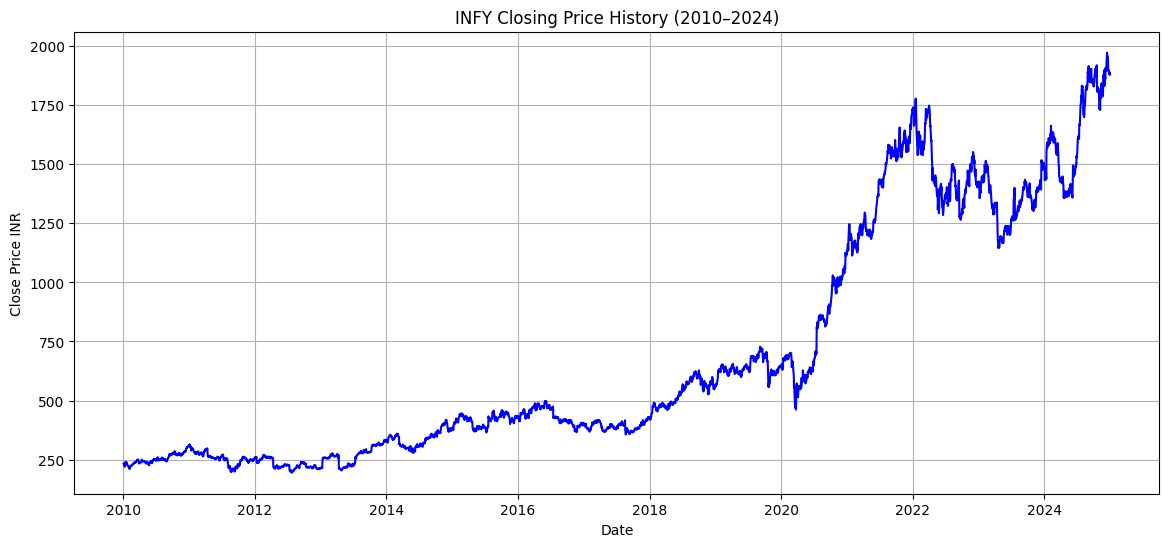

In [4]:
plt.figure(figsize=(14, 6))
plt.title("INFY Closing Price History (2010–2024)")
plt.plot(df['Close'], color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price INR')
plt.grid(True)
plt.show()

### Plot Moving Averages

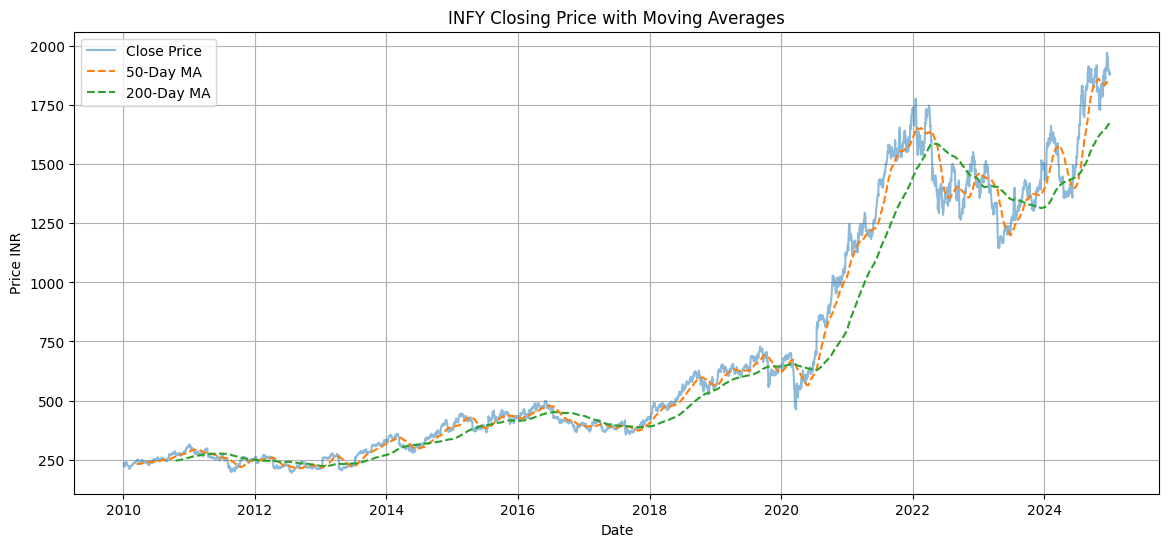

In [5]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 6))
plt.title("INFY Closing Price with Moving Averages")
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['MA50'], label='50-Day MA', linestyle='--')
plt.plot(df['MA200'], label='200-Day MA', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price INR')
plt.legend()
plt.grid(True)
plt.show()

### Correlation Heatmap

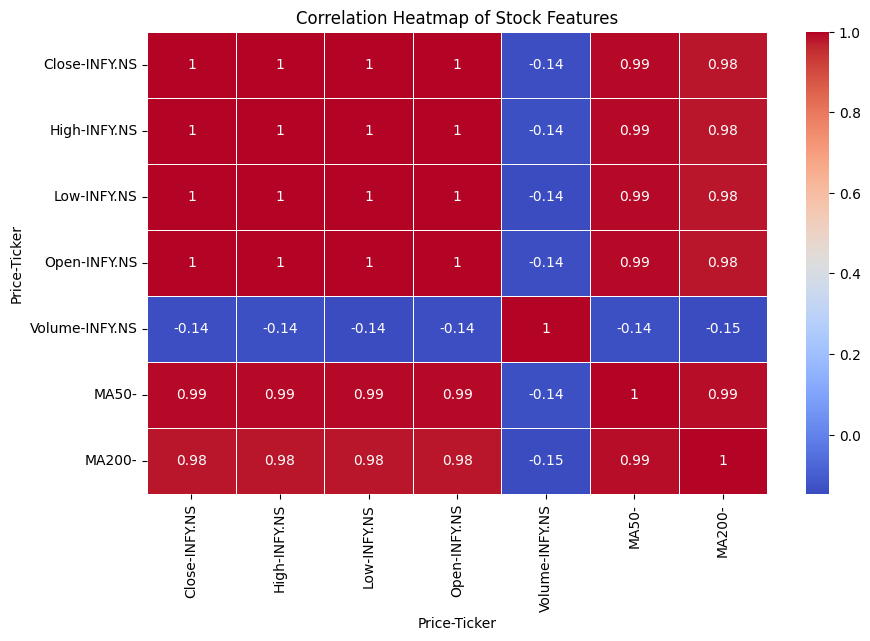

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Stock Features")
plt.show()

### Daily Returns Histogram

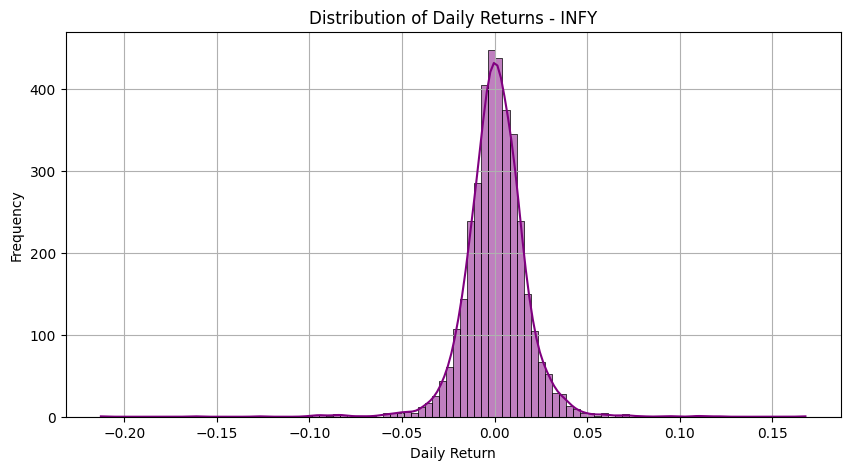

In [7]:
df['Daily Return'] = df['Close'].pct_change()
plt.figure(figsize=(10, 5))
sns.histplot(df['Daily Return'].dropna(), bins=100, kde=True, color='purple')
plt.title("Distribution of Daily Returns - INFY")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## 🧼 4. Data Preprocessing

In [8]:
# Select the 'Close' column correctly from MultiIndex columns
data = df[('Close', 'INFY.NS')].to_frame()
dataset = data.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

training_data_len = int(np.ceil(len(scaled_data) * 0.8))
train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]

## 🧱 5. Create Training Dataset

In [9]:
X_train, y_train = [], []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
X_train

array([[[0.02171156],
        [0.02215095],
        [0.02023011],
        ...,
        [0.02329343],
        [0.02187977],
        [0.02461662]],

       [[0.02215095],
        [0.02023011],
        [0.01731492],
        ...,
        [0.02187977],
        [0.02461662],
        [0.02499329]],

       [[0.02023011],
        [0.01731492],
        [0.01425909],
        ...,
        [0.02461662],
        [0.02499329],
        [0.02365248]],

       ...,

       [[0.74689505],
        [0.74175744],
        [0.74870994],
        ...,
        [0.84855645],
        [0.85159929],
        [0.85296604]],

       [[0.74175744],
        [0.74870994],
        [0.75589246],
        ...,
        [0.85159929],
        [0.85296604],
        [0.86423494]],

       [[0.74870994],
        [0.75589246],
        [0.74605171],
        ...,
        [0.85296604],
        [0.86423494],
        [0.86297148]]])

## 🧠 6. Build LSTM Model

In [14]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

c:\Users\saksh\OneDrive\Desktop\Stock-Price-Prediction-Analysis\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

## 🏋️‍♂️ 7. Train the Model

In [15]:
model.fit(X_train, y_train, batch_size=64, epochs=50)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.0169 - mae: 0.0800
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 8.3469e-04 - mae: 0.0181
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 6.1106e-04 - mae: 0.0147
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 5.9708e-04 - mae: 0.0142
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 6.2969e-04 - mae: 0.0141
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 7.5192e-04 - mae: 0.0159
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 4.6607e-04 - mae: 0.0128
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 4.4846e-04 - mae: 0.0125
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 4.3476e-04 - mae: 0.0129
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 3.8851e-04 - mae: 0.0126
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4.0659e-04 - mae: 0.0124
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 3.9775e-04 - mae: 

## 🔮 8. Create Test Data

In [16]:
X_test, y_test = [], dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step


## 📊 9. Evaluation

In [17]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

RMSE: 48.6430
MAE: 39.4074


## 📈 10. Plot Predictions vs Actual

C:\Users\saksh\AppData\Local\Temp\ipykernel_15856\3290496759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


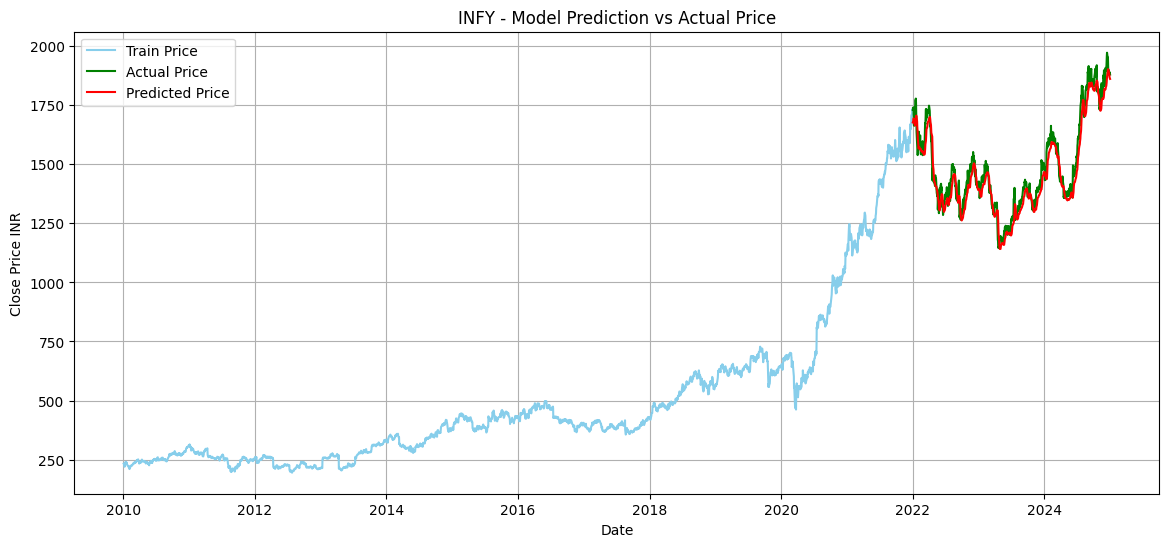

In [18]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(14, 6))
plt.title("INFY - Model Prediction vs Actual Price")
plt.plot(train['Close'], label='Train Price', color='skyblue')
plt.plot(valid['Close'], label='Actual Price', color='green')
plt.plot(valid['Predictions'], label='Predicted Price', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price INR')
plt.legend()
plt.grid(True)
plt.show()

## 🔍 11. Zoomed Prediction View

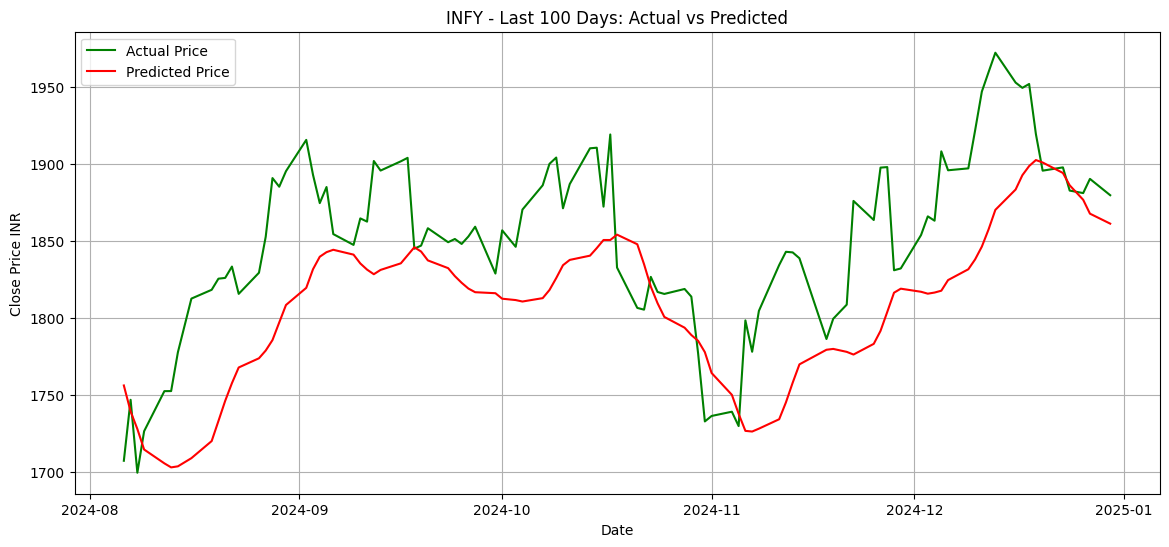

In [19]:
plt.figure(figsize=(14, 6))
plt.title("INFY - Last 100 Days: Actual vs Predicted")
plt.plot(valid['Close'][-100:], label='Actual Price', color='green')
plt.plot(valid['Predictions'][-100:], label='Predicted Price', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price INR')
plt.legend()
plt.grid(True)
plt.show()

## 💾 12. Save the Model

In [28]:
model.save("infy_lstm_model.keras")